## CAR PRICE PREDICTION MODEL

The most important aspect of data analysis is how you approach the problem. This involves asking the right questions in terms of data.
Let's understand this by taking an example. Suppose you have a friend Kin and he wants to sell his old car. He is unable to decide a reasonable selling price for his car and he wants your help. As a data analyst, how would you help your friend?
Here are some questions which you can ask yourself:
1. Is there any dataset available on prices of other cars and their characteristics?
1. What are features of cars affect their prices (say color, brand, model, horsepower, etc.)?

Once you found an appropriate dataset, now is the time to move onto answering the next question. Here comes the main role of a data analyst. Use your python analysis skills to find what car features affect the price of a car so that you can help Kin in determining the right selling price for his car.

### Importing dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('auto.csv', header = None)
print(df)

     0    1            2       3      4     5            6    7      8   \
0     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
1     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
2     1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   
3     2  164         audi     gas    std  four        sedan  fwd  front   
4     2  164         audi     gas    std  four        sedan  4wd  front   
..   ..  ...          ...     ...    ...   ...          ...  ...    ...   
200  -1   95        volvo     gas    std  four        sedan  rwd  front   
201  -1   95        volvo     gas  turbo  four        sedan  rwd  front   
202  -1   95        volvo     gas    std  four        sedan  rwd  front   
203  -1   95        volvo  diesel  turbo  four        sedan  rwd  front   
204  -1   95        volvo     gas  turbo  four        sedan  rwd  front   

        9   ...   16    17    18    19    20   21    22  23  24     25  
0     88.6  ...  130  mpfi

This dataset has no headers, so we have to assign the column names by ourselves.

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

In [4]:
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

There are some rows in the dataframe which contain '?'. We need to replace them with NaN so that they can be treated as null values and dropped or changed in future if needed.

### Understandig the data

Before moving onto data analysis process, it's important to know about your data, i.e., to understand the data types of all columns and distribution of data.

**Reason:**
- While loading data into python, pandas automatically assigns data types to the columns. So it's crucial to know whether this task has been done correctly.
- To check compatibility with python methods, we need to know whether we can use specific methods on columns, such as numerical methods like sum() cannot be applied on object data type.
- It's also a good practice to understand the data distribution to know about potential outliers, large standard deviations, etc.

In [5]:
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


| Attribute           | Attribute Range                                       |
|---------------------|-------------------------------------------------------|
| symboling           | -3, -2, -1, 0, 1, 2, 3                                |
| normalized-losses   | continuous from 65 to 256                             |
| make                | alfa-romero, audi, bmw, chevrolet, dodge, honda,     |
|                     | isuzu, jaguar, mazda, mercedes-benz, mercury,        |
|                     | mitsubishi, nissan, peugot, plymouth, porsche,       |
|                     | renault, saab, subaru, toyota, volkswagen, volvo     |
| fuel-type           | diesel, gas                                           |
| aspiration          | std, turbo                                            |
| num-of-doors        | four, two                                             |
| body-style          | hardtop, wagon, sedan, hatchback, convertible        |
| drive-wheels        | 4wd, fwd, rwd                                         |
| engine-location     | front, rear                                           |
| wheel-base          | continuous from 86.6 to 120.9                         |
| length              | continuous from 141.1 to 208.1                        |
| width               | continuous from 60.3 to 72.3                          |
| height              | continuous from 47.8 to 59.8                          |
| curb-weight         | continuous from 1488 to 4066                          |
| engine-type         | dohc, dohcv, l, ohc, ohcf, ohcv, rotor                |
| num-of-cylinders    | eight, five, four, six, three, twelve, two           |
| engine-size         | continuous from 61 to 326                            |
| fuel-system         | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi         |
| bore                | continuous from 2.54 to 3.94                          |
| stroke              | continuous from 2.07 to 4.17                          |
| compression-ratio   | continuous from 7 to 23                              |
| horsepower          | continuous from 48 to 288                             |
| peak-rpm            | continuous from 4150 to 6600                          |
| city-mpg            | continuous from 13 to 49                              |
| highway-mpg         | continuous from 16 to 54                              |
| price               | continuous from 5118 to 45400                         |


#### Checking data types of all columnns

In [6]:
print(df.dtypes) 
# df.dtypes returns a series of data types of all columns

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


To get the statistical summary of each column, e.g. count, mean value, standard deviation, etc., we use desrbe method.
Note: This number will provide various summary statistics, excluding NaN values.

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


This shows the statistical summary of all numeric-typed columns.
To check all the columns including those that are objects, add an argument include = 'all'.

In [8]:
df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


top -> most frequent value in object-type column

freq -> frequency of top in its respective column

Another method to check the dataset is: info()

It provides a concise summary of the dataframe.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Data Wrangling

It is the process of converting data from initial format to a format that may be better for analysis.

In [10]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


#### 1.Handling missing values

As it is evident that there are several NaN values in the dataframe, these may hinder the further analysis.

Steps for working with missing data:
1. Identify missing data
2. Deal with missing data
3. Correct data format

#### Identify and handle missing values

**Identify missing values**

Convert '?' to NaN

In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:

    .replace(A, B, inplace = True)
     
to replace A by B. 

In [11]:
import numpy as np

In [12]:
df.replace('?', np.nan, inplace = True)
print(df.head(10))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2               NaN         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1               NaN         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0               NaN         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd    

**Evaluating for Missing Data**

We use the following functions to identify these missing values. There are two methods to detect missing values:

1. .isnull()
2. .notnull()

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

'True' means that the value is missing while 'False' means that the value is not a missing value.

**Count missing values in each column**

We can use for loop to see each column and then apply .value_counts() method to count the number of True values which are returned by .isnull() method.

In [13]:
for column in df.columns:
    print(column, df[column].isnull().value_counts())
    print("")

symboling False    205
Name: symboling, dtype: int64

normalized-losses False    164
True      41
Name: normalized-losses, dtype: int64

make False    205
Name: make, dtype: int64

fuel-type False    205
Name: fuel-type, dtype: int64

aspiration False    205
Name: aspiration, dtype: int64

num-of-doors False    203
True       2
Name: num-of-doors, dtype: int64

body-style False    205
Name: body-style, dtype: int64

drive-wheels False    205
Name: drive-wheels, dtype: int64

engine-location False    205
Name: engine-location, dtype: int64

wheel-base False    205
Name: wheel-base, dtype: int64

length False    205
Name: length, dtype: int64

width False    205
Name: width, dtype: int64

height False    205
Name: height, dtype: int64

curb-weight False    205
Name: curb-weight, dtype: int64

engine-type False    205
Name: engine-type, dtype: int64

num-of-cylinders False    205
Name: num-of-cylinders, dtype: int64

engine-size False    205
Name: engine-size, dtype: int64

fuel-system Fa

Based on the summary above, each column has 205 rows of data and 7 of the columns have missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

**Deal with missing data**

1. Drop data

    a. Drop the whole row

    b. Drop the whole column

2. Replace data

    a. Replace it by mean

    b. Replace it by frequency
    
    c. Replace it based on another function

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. 

**Replace by Mean:**(numeric columns)

- "normalized-losses": 41 missing data, replace them with mean
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean
- "peak-rpm": 2 missing data, replace them with mean

**Replace by Frequency:**(non-numeric columns)

- "num-of-doors": 2 missing data, replace them with "four".
    - Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

**Drop the whole row:**

- "price": 4 missing data, simply delete the whole row
    - Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us.



Calculate the mean value of the required columns and replace the null values with the means.

In [14]:
replace_mean = ['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']
for column in replace_mean:
    avg_column = df[column].astype('float').mean(axis = 0)
    print('Average of', column, 'is', avg_column)
    df[column].replace(np.nan, avg_column, inplace = True)
    print('Null values in', column, 'replaced successfully with mean', avg_column)
    print('')



Average of normalized-losses is 122.0
Null values in normalized-losses replaced successfully with mean 122.0

Average of stroke is 3.255422885572139
Null values in stroke replaced successfully with mean 3.255422885572139

Average of bore is 3.3297512437810943
Null values in bore replaced successfully with mean 3.3297512437810943

Average of horsepower is 104.25615763546799
Null values in horsepower replaced successfully with mean 104.25615763546799

Average of peak-rpm is 5125.369458128079
Null values in peak-rpm replaced successfully with mean 5125.369458128079



In [15]:
replace_mean = ['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']
for column in replace_mean:
    print(df[column].isnull().value_counts())
    print('')

False    205
Name: normalized-losses, dtype: int64

False    205
Name: stroke, dtype: int64

False    205
Name: bore, dtype: int64

False    205
Name: horsepower, dtype: int64

False    205
Name: peak-rpm, dtype: int64



No null values in 'normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm'

Replace null values in 'num-of-doors' by 'four' because it is the most frequent value in this column and we have only 2 null values.

In [16]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)
print('Null values in "num-of-doors" replaced successfully!')

Null values in "num-of-doors" replaced successfully!


In [17]:
df['num-of-doors'].isnull().value_counts()

False    205
Name: num-of-doors, dtype: int64

Drop rows from the dataframe containing null values in price column

In [18]:
df.dropna(subset=['price'], axis = 0, inplace=True)

# Adjusting the indeces after dropping rows
df.reset_index(drop=True, inplace=True)
print('Rows with null values in "price" dropped successfully and index reset!')

Rows with null values in "price" dropped successfully and index reset!


In [19]:
df['price'].isnull().value_counts()

False    201
Name: price, dtype: int64

In [20]:
for column in df.columns:
    print(column, df[column].isnull().value_counts())
    print("\n")

symboling False    201
Name: symboling, dtype: int64


normalized-losses False    201
Name: normalized-losses, dtype: int64


make False    201
Name: make, dtype: int64


fuel-type False    201
Name: fuel-type, dtype: int64


aspiration False    201
Name: aspiration, dtype: int64


num-of-doors False    201
Name: num-of-doors, dtype: int64


body-style False    201
Name: body-style, dtype: int64


drive-wheels False    201
Name: drive-wheels, dtype: int64


engine-location False    201
Name: engine-location, dtype: int64


wheel-base False    201
Name: wheel-base, dtype: int64


length False    201
Name: length, dtype: int64


width False    201
Name: width, dtype: int64


height False    201
Name: height, dtype: int64


curb-weight False    201
Name: curb-weight, dtype: int64


engine-type False    201
Name: engine-type, dtype: int64


num-of-cylinders False    201
Name: num-of-cylinders, dtype: int64


engine-size False    201
Name: engine-size, dtype: int64


fuel-system False    20

Great! We have no missing data now. Time to move further with the analysis!

#### 2.Correct data format

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

.dtype() to check the data type

.astype() to change the data type

In [21]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [22]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [23]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Wonderful!

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

#### 3. Data Standardisation

Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)

**What is standardization?**

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

**Example**

Transform mpg to L/100km:

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.

We will need to apply data transformation to transform mpg into L/100km.


The formula for unit conversion is:

$$ L/100km = 235 / mpg $$

We can do many mathematical operations directly in Pandas.

In [24]:
df['city-mpg'] = 235/df['city-mpg']
df.rename(columns = {'city-mpg':'city-L/100km'}, inplace=True)

In [25]:
df 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,10.217391,28,16845.0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,12.368421,25,19045.0
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,13.055556,23,21485.0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,9.038462,27,22470.0


In [26]:
df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace=True)

In [27]:
df 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,10.217391,8.392857,16845.0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,12.368421,9.400000,19045.0
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,13.055556,10.217391,21485.0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,9.038462,8.703704,22470.0


#### 4. Data Normalization

**Why normalization?**

Normalization is the process of transforming values of several variables into a similar range. Typical normalization include scaling the variable:
 - so the variable average is 0,
 - so the variance is 1,
 - so the variable values range from 0 to 1.

**Example**

Let's scale the columns length, width, height.

We would like to scale the variables into a range of 0 to 1.

*Approach:* 
    $$ new Value = original Value / maximum Value $$

In [28]:
dimensions = ['length', 'width', 'height']
for col in dimensions:
    df[col] = df[col] / df[col].max()

In [29]:
for col in df[dimensions]:
    print((col, min(df[col]), max(df[col])))
    print('')

('length', 0.6780394041326285, 1.0)

('width', 0.8374999999999999, 1.0)

('height', 0.7993311036789298, 1.0)



Successfully normalized the dimensions in the range 0 to 1.

#### 5. Binning

**Why Binning?**

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

**Example**

In our dataset, 'horsepower' is a real valued ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.


In [30]:
df['horsepower'].dtype 

dtype('O')

In [31]:
df['horsepower'] = df['horsepower'].astype(int)
print(df['horsepower'].dtype)

int32


Let's plot a histogram to see what the distribution of horsepower looks like.

In [32]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'horsepower bins')

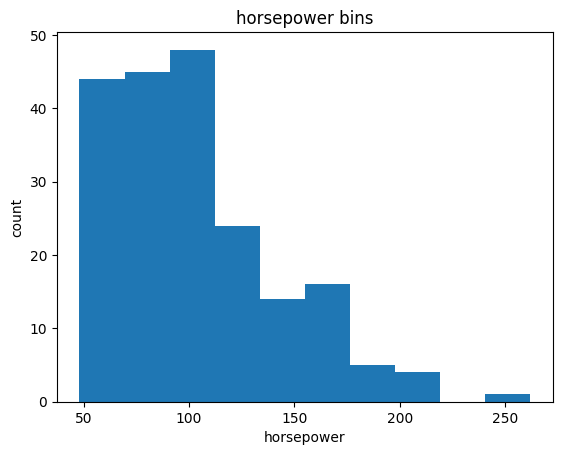

In [33]:
plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

We would like 3 bins of equal size bandwidth so we use numpy's $$ linspace(startValue, endValue, numbersGenerated) $$


Since we want to include the minimum value of horsepower, we want to set 
$$startValue = min(df['horsepower'])$$

Since we want to include the maximum value of horsepower, we want to set 
$$endValue = max(df['horsepower'])$$

Since we are building 3 bins of equal length, there should be 4 dividers, so 
$$numbersGenerated = 4$$

We build array with a minimum value to a maximum value by using the bandwidth calculated above. The results will determine when one bin ends and another begins.

In [34]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [35]:
groups = ['low', 'medium', 'high']

We apply the function "cut" to determine what each value of df['horsepower'] belongs to.

In [36]:
from xml.etree.ElementInclude import include


df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = groups, include_lowest=True)


In [37]:
df[['horsepower', 'horsepower-binned']]

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
...,...,...
196,114,low
197,160,medium
198,134,medium
199,106,low


Let's see the number of vehicles in each bin

In [38]:
df['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Let's plote distribution of each bin

Text(0.5, 1.0, 'horsepower bins')

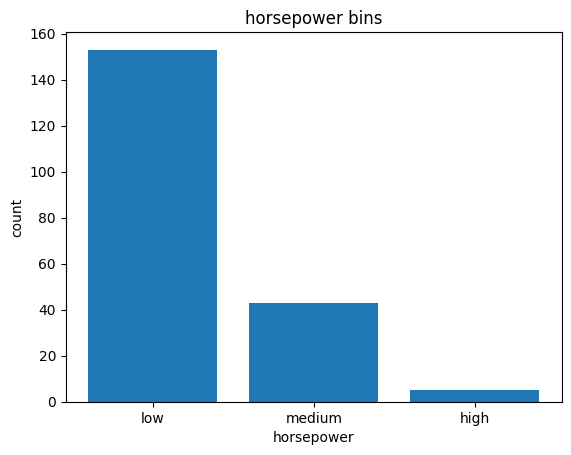

In [39]:
plt.bar(groups, df['horsepower-binned'].value_counts())

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

**Bins visualization**

Normally, a histogram is used to visualize the distribution of bins we created above.

Text(0.5, 1.0, 'horsepower bins')

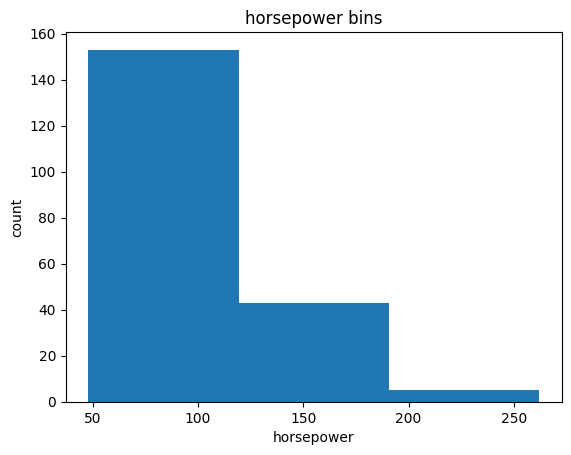

In [40]:
plt.hist(df['horsepower'], bins = 3)

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### Indicator variable or Dummy variable

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why we use indicator variables?

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

Example
We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.

Get the indicator variable and assign it to data frame 'dummy_variable_1'

In [41]:
df.columns 

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price', 'horsepower-binned'],
      dtype='object')

In [42]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Change names for clarity

In [43]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

In [44]:
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [45]:
df = pd.concat([df, dummy_variable_1], axis = 1)
df.drop('fuel-type', axis = 1, inplace = True)

In [46]:
df 

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,3.15,9.5,114,5400.0,10.217391,8.392857,16845.0,low,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.15,8.7,160,5300.0,12.368421,9.400000,19045.0,medium,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,2.87,8.8,134,5500.0,13.055556,10.217391,21485.0,medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.40,23.0,106,4800.0,9.038462,8.703704,22470.0,low,1,0


In [47]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [48]:
dummy_variable_2.rename(columns = {'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [49]:
df = pd.concat([df, dummy_variable_2], axis = 1)

In [50]:
df 

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,13495.0,low,0,1,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,16500.0,low,0,1,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,12.368421,9.038462,16500.0,medium,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,9.791667,7.833333,13950.0,low,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,13.055556,10.681818,17450.0,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,114,5400.0,10.217391,8.392857,16845.0,low,0,1,1,0
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,160,5300.0,12.368421,9.400000,19045.0,medium,0,1,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,134,5500.0,13.055556,10.217391,21485.0,medium,0,1,1,0
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,106,4800.0,9.038462,8.703704,22470.0,low,1,0,0,1


In [51]:
df.to_csv('clean_df.csv')

## EXPLORATORY DATA ANALYSIS

It is a premilinary step in data analysis process.
It is used to:

    - Summarize main characteristics of the data
    - Gain better understanding of dataset
    - Extract important variables.

**Question to be solved using EDA:**

What are the characteristics that have most impact on the car price?

### Analyzing individual feature patterns using visualizations

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

**How to choose the right visualization?**

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [53]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-L/100km          float64
highway-L/100km       float64
price                 float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

We can calculate the correlation between variables of type 'int64' or 'float64' using .corr() method

In [54]:
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064,-0.218233,0.218233


Let's find the correlation between bore, stroke, compression-ratio and horsepower.

In [55]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


**Conitnuous numerical variables:**

These are the variables that may contain any value within some range. They can be of any type 'int64' or 'float64'.

A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

Positive Linear Relationship

<Axes: xlabel='engine-size', ylabel='price'>

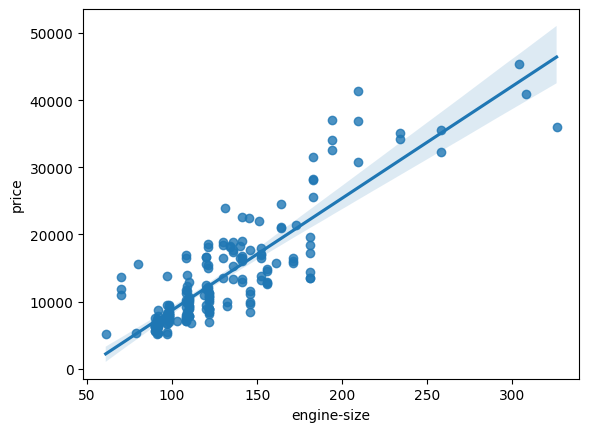

In [56]:
sns.regplot(x = 'engine-size', y = 'price', data = df)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [57]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Correlation between engine-size and price is approx 0.87 (strong correlation).

<Axes: xlabel='highway-L/100km', ylabel='price'>

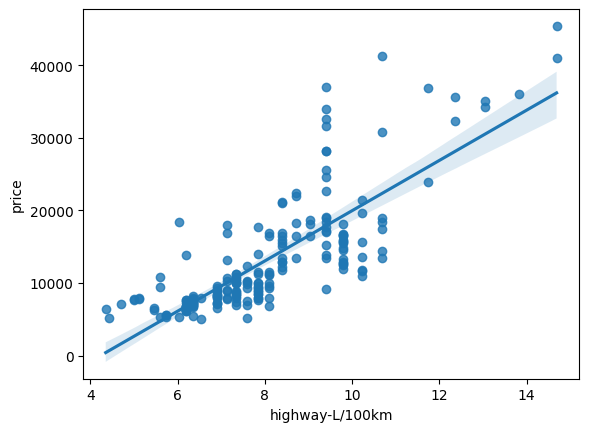

In [58]:
sns.regplot(x = 'highway-L/100km', y = 'price', data = df)

In [59]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


Strong positive correlation of 0.80 between highway-L/100km and price

In [60]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<Axes: xlabel='stroke', ylabel='price'>

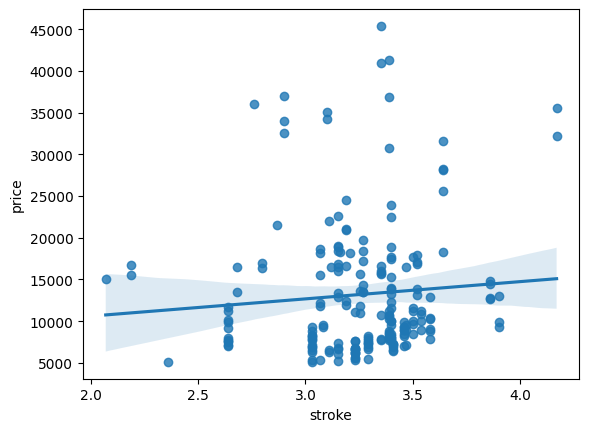

In [61]:
sns.regplot(x = 'stroke', y = 'price', data = df)

**Categorical variables**

These are the variables that describe a 'charactersitic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

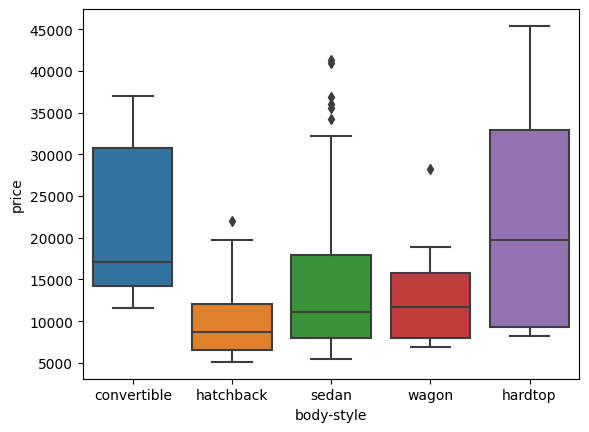

In [62]:
sns.boxplot(x = 'body-style', y = 'price', data = df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

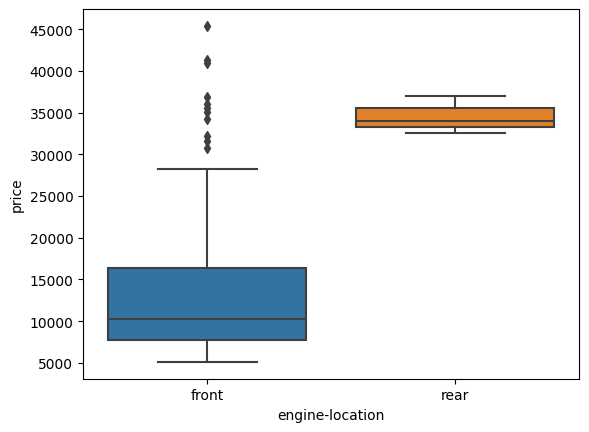

In [63]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price"

<Axes: xlabel='drive-wheels', ylabel='price'>

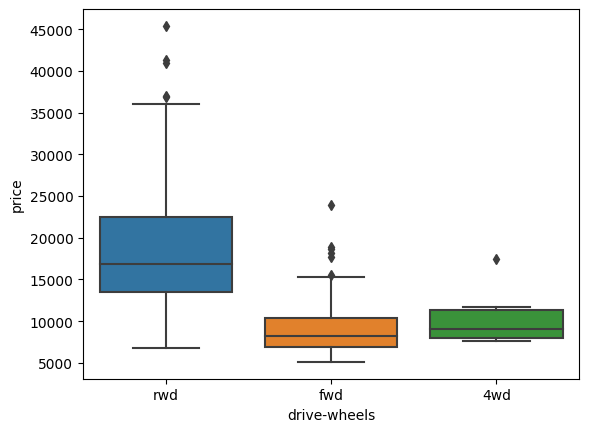

In [64]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

#### Descriptive Statistical Analysis

To look at the basic statistical summary of data, use .describe() method.

In [65]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,165,115,94,118,198,145,157,92


**Value Counts**

It is a good way of understanding how many units of each characteristic/variable we have. This method only works in pandas Series not on Dataframe.

In [67]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Convert it into dataframe:

In [68]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [69]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheel_counts

,value_counts
fwd,118
rwd,75
4wd,8


Repeat above steps for 'engine-location'

In [70]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

#### Grouping

The 'groupby' method groups data by different categories. The data is grouped on one or several variables, and analysis is performed on the individual groups.

In [71]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Let's say we want to know, on average, which type of drive wheel is most valuable, we can group 'drive-wheels' and then average them.

In [72]:
df_group_one = df[['drive-wheels','body-style','price']]

In [73]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean(numeric_only = True)
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [74]:
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean(numeric_only = True)
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286



This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table

In [75]:
grouped_pivot = grouped_test1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [76]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [87]:
df_group_two = df[['body-style', 'price']]

In [88]:
type(df_group_two)

pandas.core.frame.DataFrame

In [94]:
df_body_style = df_group_two.groupby(['body-style'], as_index=False).mean()
df_body_style

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [95]:
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's use a heatmap to visualize the relationship between Body style and price

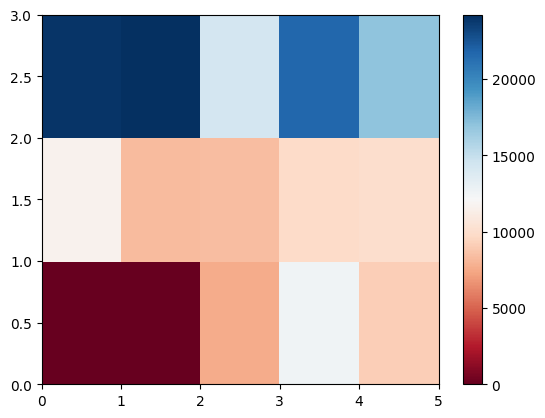

In [96]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Let's add information to the map.

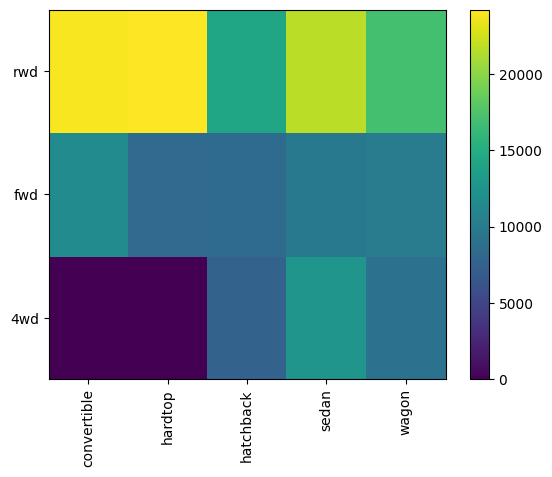

In [98]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot)

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()